In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
layoff_data = pd.read_csv('layoff data.csv')

In [6]:
print(layoff_data.head())
# 确保 Date 列是 datetime 类型
layoff_data['Date'] = pd.to_datetime(layoff_data['Date'])

          Company     Location  # Laid Off        Date    %    Industry  \
0             AMD  SF Bay Area      1000.0  11/13/2024   4%    Hardware   
1        AppLovin  SF Bay Area       120.0  11/13/2024  21%   Marketing   
2           Chegg  SF Bay Area       319.0  11/13/2024  17%   Education   
3  Enphase Energy  SF Bay Area       500.0  11/11/2024  17%      Energy   
4         23andMe  SF Bay Area       200.0  11/11/2024  40%  Healthcare   

                     Source     Stage $ Raised        Country  Date Added  
0    https://www.techope...  Post-IPO  $1,600   United States  11/13/2024  
1  https://www.sfgate.co...  Post-IPO    $227   United States  11/16/2024  
2   https://www.wsj.com/...  Post-IPO    $116   United States  11/13/2024  
3  https://www.sfgate.co...  Post-IPO  $1,100   United States  11/11/2024  
4   https://www.wsj.com/...  Post-IPO    $484   United States  11/11/2024  


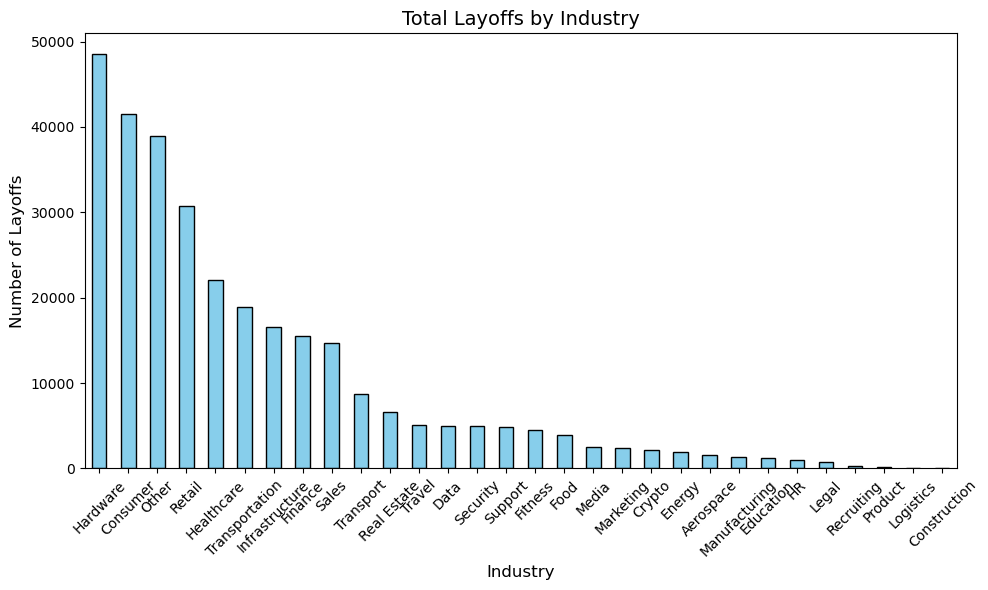

In [34]:
# 画图
plt.figure(figsize=(10, 6))
industry_totals.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Layoffs by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Layoffs', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# 保存图像
plt.savefig('Total_Layoffs_by_Industry.png', dpi=300)

# 显示图像
plt.show()


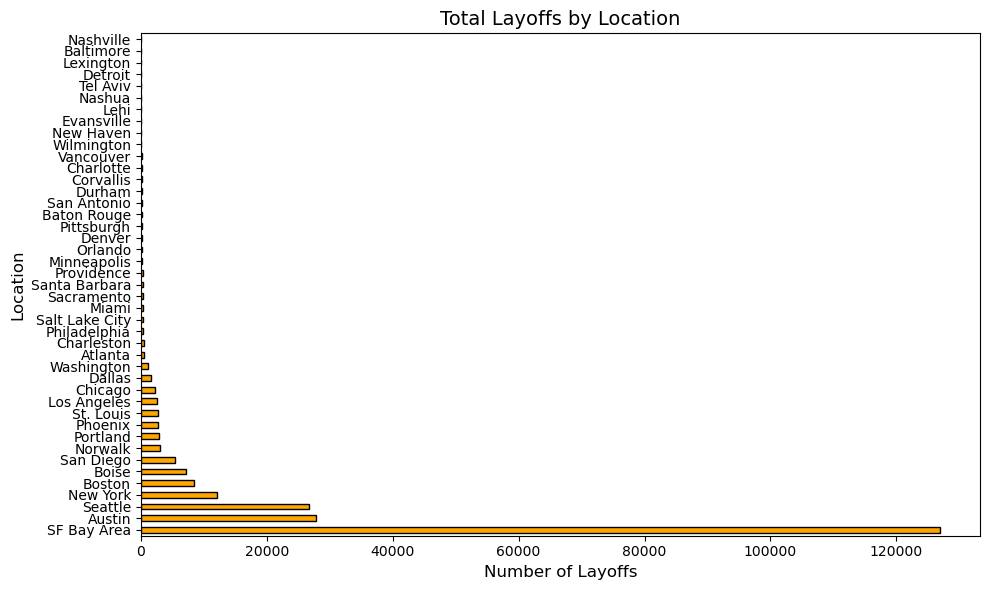

In [36]:

# 图 2: 按地区裁员人数统计
location_totals = layoff_data.groupby('Location')['# Laid Off'].sum()
plt.figure(figsize=(10, 6))
location_totals.sort_values(ascending=False).plot(kind='barh', color='orange', edgecolor='black')
plt.title('Total Layoffs by Location', fontsize=14)
plt.xlabel('Number of Layoffs', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()

plt.savefig('Total_Layoffs_by_Location.png', dpi=300)

plt.show()

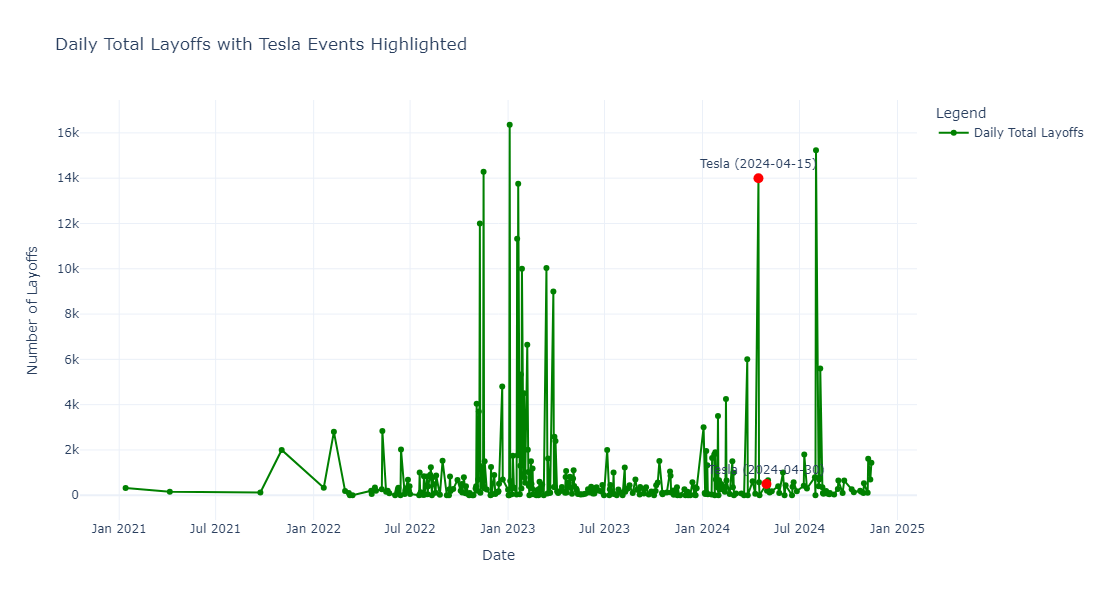

In [26]:
import plotly.graph_objects as go

# 创建总裁员人数的折线图
fig = go.Figure()

# 添加总裁员人数的折线
fig.add_trace(go.Scatter(
    x=daily_totals.index,
    y=daily_totals.values,
    mode='lines+markers',
    name='Daily Total Layoffs',
    line=dict(color='green', width=2),
    marker=dict(size=6)
))

# 添加 Tesla 数据点
for _, row in tesla_layoffs.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Date']],
        y=[row['# Laid Off']],
        mode='markers+text',
        name=f'Tesla Layoff ({row["Date"].date()})',
        text=f'Tesla ({row["Date"].date()})',
        textposition="top center",
        marker=dict(color='red', size=10, symbol='circle'),
        showlegend=False  # 避免重复图例
    ))

# 图表布局设置
fig.update_layout(
    title='Daily Total Layoffs with Tesla Events Highlighted',
    xaxis_title='Date',
    yaxis_title='Number of Layoffs',
    legend_title='Legend',
    template='plotly_white',
    height=600,
    width=1000
)

# 展示交互式图表
fig.show()

# 保存为 HTML 文件
fig.write_html("daily_total_layoffs with Tesla.html")